Why convs are so good? When you apply a convolution to an image, you can learn to detect simple patterns like horizontal or vertical lines, changes in color, or grid patterns. When you stack convolutions in layers, they begin to recognize more complex patterns, building upon the simpler convolutions that came before.

When representing an image, we have 4 dims -> (N,C,W,H)
* Number of images
* Channels (different colors)
* Width
* Height

For all the experiments, I will be using the mnist dataset. Although toy example, it makes it very easy to load and experiment, whereas real world image data impose more complexity which needs more time away from networks and into data engineering, which is not the point now.

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm
from sklearn.metrics import accuracy_score

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

import time

import torchvision 
from torchvision import transforms
from pylab import *

In [19]:
import idlmam

In [5]:
mnist_data_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

x_example, y_example = mnist_data_train[0]
type(x_example), print(x_example.shape)

torch.Size([1, 28, 28])


(torch.Tensor, None)

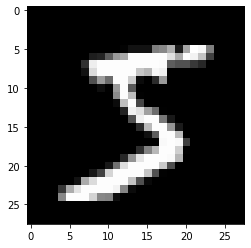

In [9]:
imshow(x_example[0], cmap='gray')

In [15]:
if torch.backends.mps.is_available(): 
    device = torch.device("mps") 
else:
    device = torch.device("cpu")
        
B = 32 
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True) 
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [17]:
# Let's train a simple CNN side by a simple nn on MNIST

D = 28 * 28
C = 1 
classes = 10
filters = 16
K = 3 

# For comparison, let's add the linear model of same complexity 

model_linear = nn.Sequential(
    nn.Flatten(), # (B, C, W, H) -> (B, C*W*H) = (B, D)
    nn.Linear(D, 256),
    nn.Tanh(),
    nn.Linear(256, classes),
)

model_cnn = nn.Sequential(
    nn.Conv2d(C, filters, K, padding=K//2), # of input channels, #filtersoutput-channels, #filter-size
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(filters*D, classes),
)   

In [23]:
loss_func = nn.CrossEntropyLoss()
cnn_results = idlmam.train_simple_network(model_cnn,
                                          loss_func,
                                          mnist_train_loader,
                                          mnist_test_loader,
                                          score_funcs={'Accuracy': accuracy_score},
                                          device=device,
                                          epochs=20)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

In [24]:
fc_results = idlmam.train_simple_network(model_linear, 
                                         loss_func, 
                                         mnist_train_loader, test_loader=mnist_test_loader, 
                                         score_funcs={'Accuracy': accuracy_score}, 
                                         device=device, 
                                         epochs=20)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

<AxesSubplot:xlabel='epoch', ylabel='test Accuracy'>

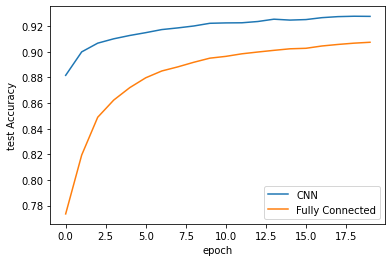

In [25]:
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results, label='CNN') 
sns.lineplot(x='epoch', y='test Accuracy', data=fc_results, label='Fully Connected')

Now let's introduce Pooling to the mix. Why?

Pooling can enable us to obtain partial translation invariance. 

The intuition behind pooling is that it gives us more robustness to slight changes in values. 

However, how many pooling layers should we add before completely shrinking our image? Common practice is to increase the number of filters by K x after every round of pooling 

In [26]:
model_cnn_pool = nn.Sequential(
    nn.Conv2d(C, filters, 3, padding=3//2),
    nn.Tanh(),
    nn.Conv2d(filters, filters, 3, padding=3//2),
    nn.Tanh(),
    nn.Conv2d(filters, filters, 3, padding=3//2),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(filters, 2*filters, 3, padding=3//2),
    nn.Tanh(),
    nn.Conv2d(2*filters, 2*filters, 3, padding=3//2),
    nn.Tanh(),
    nn.Conv2d(2*filters, 2*filters, 3, padding=3//2),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(2*filters*D//(4**2), classes),
)

cnn_results_with_pool = idlmam.train_simple_network(model_cnn_pool,
                                                    loss_func,
                                                    mnist_train_loader,
                                                    mnist_test_loader,
                                                    score_funcs={'Accuracy': accuracy_score},
                                                    device=device,
                                                    epochs=20)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

<AxesSubplot:xlabel='epoch', ylabel='test Accuracy'>

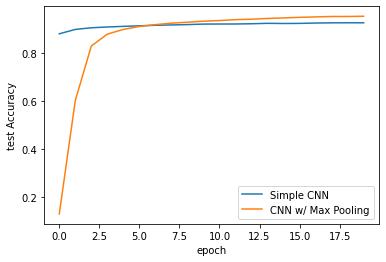

In [27]:
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results,label='Simple CNN')
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results_with_pool,
label='CNN w/ Max Pooling')

Bonus: Data augmentation - we need more data

In [28]:
sample_transforms = {                  

    "Rotation" : transforms.RandomAffine(degrees=45), 
    "Translation" : transforms.RandomAffine(degrees=0, translate=(0.1,0.1)), 
    "Shear": transforms.RandomAffine(degrees=0, shear=45), 
    "RandomCrop" : transforms.RandomCrop((20,20)), 
    "Horizontal Flip" : transforms.RandomHorizontalFlip(p=1.0), 
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0), 
    "Perspective": transforms.RandomPerspective(p=1.0), 
    "ColorJitter" : transforms.ColorJitter(brightness=0.9, contrast=0.9)
}

How to apply to your data? 

In [30]:
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, 
                            translate=(0.05, 0.05), 
                            scale=(0.98, 1.02)), 
                            transforms.ToTensor(), 
])

In [31]:
test_transform = transforms.ToTensor()

mnist_train_t = torchvision.datasets.MNIST("./data", 
                                           train=True, transform=train_transform) 

mnist_test_t = torchvision.datasets.MNIST("./data", 
                                          train=False, 
                                          transform=test_transform)

mnist_train_loader_t = DataLoader(mnist_train_t, 
                                  shuffle=True,
                                  batch_size=B, 
                                  num_workers=5) 

mnist_test_loader_t = DataLoader(mnist_test_t, 
                                 batch_size=B,
                                 num_workers=5)


In [32]:
model_cnn_pool = nn.Sequential( 
    nn.Conv2d(C, filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.Conv2d(filters, filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.Conv2d(filters, filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.MaxPool2d(2), 
    nn.Conv2d(filters, 2*filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.Conv2d(2*filters, 2*filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.Conv2d(2*filters, 2*filters, 3, padding=3//2), 
    nn.Tanh(), 
    nn.MaxPool2d(2), 
    nn.Flatten(), 
    nn.Linear(2*filters*D//(4**2), classes),
)

cnn_results_with_pool_augmented = idlmam.train_simple_network(model_cnn_pool, 
    loss_func, mnist_train_loader_t, test_loader=mnist_test_loader_t, 
    score_funcs={'Accuracy': accuracy_score}, device=device, epochs=20)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
sns.lineplot(x='epoch', y='test Accuracy', data=cnn_results_with_pool,
label='CNN w/ Max Pooling') 

sns.lineplot(x='epoch', y='test Accuracy',
data=cnn_results_with_pool_augmented,
label='CNN w/ Max Pooling + Augmentation')

With a careful choice of augmentation, we helped our model learn faster and converge to a better-quality solution, 96.2% accuracy instead of 95.7%